In [2]:
# -*- coding: utf-8 -*-

#from keras.models import Sequential
import keras
from keras.optimizers import SGD
#from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation
#from keras.layers import concatenate
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
import tensorflow as tf
from keras.models import Model
import cv2
from skimage.transform import resize
from keras.models import model_from_json
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
from keras.utils import multi_gpu_model
from keras.utils import np_utils
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy.fftpack import dct,idct 
import sys
sys.setrecursionlimit(1000)
from keras.preprocessing.image import ImageDataGenerator
from timeit import default_timer as timer    
import random
from keras_preprocessing.image import ImageDataGenerator
from numpy import linspace
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# Check if we're using a GPU device
# See what GPU we're using
from tensorflow.python.client import device_lib
device_lib.list_local_devices()# Check if we're using a GPU device
from sklearn.metrics import classification_report, confusion_matrix
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import efficientnet.keras as efn 
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

Using TensorFlow backend.


In [24]:
##############################################################################################################
#model = keras.models.load_model('/home/hadi/python/SparseFool/ordered/CFAR_10/models/resnet_50/saved_model/resnet50_CIFAR10.h5')
model = keras.models.load_model('/home/hadi/python/SparseFool/ordered/CFAR_10/effectOfSparsity/DenseNet121/saved_model/DenseNet121_CIFAR10_raw_10.h5')
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
##############################################################################################################

W0522 03:46:26.620241 139834520692480 deprecation_wrapper.py:119] From /home/hadi/anaconda3/envs/venv1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0522 03:46:27.842557 139834520692480 deprecation_wrapper.py:119] From /home/hadi/anaconda3/envs/venv1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4074: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [25]:

##############################################################################################################
def load_images_from_folder(folder):
    images = [];listName = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            listName.append(filename)
    return images,listName
#######################################
def  Klargest(x,k):
    nk = k *k *3;
    vx = x.reshape(-1);
    ss = np.argsort(np.multiply(-1, np.absolute(vx)),axis=0);#-1 for descending sort
    zeroed_x_idx = np.zeros(vx.shape);
    zeroed_x_idx [ss[0:nk]] = 1;

    return zeroed_x_idx
##############################################################################################################
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
##########################################finding most correlated image
dir0='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/airplane/'
dir1='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/automobile/'
dir2='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/bird/'
dir3='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/cat/'
dir4='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/deer/'
dir5='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/dog/'
dir6='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/frog/'
dir7='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/horse/'
dir8='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/ship/'
dir9='/home/hadi/python/SparseFool/ordered/CFAR_10/dataset/cifar/raw/test/truck'

    


list0 = [];list1 = []; list2 = []; list3 = [];list4 = [];list5 = [];list6 = [];list7 = [];list8 = [];list9 = []

listName0 = [];listName1 = []; listName2 = []; listName3 = [];listName4 = []
listName5 = [];listName6 = [];listName7 = [];listName8 = [];listName9 = []

list0,listName0 = load_images_from_folder(dir0)
list1,listName1 = load_images_from_folder(dir1)
list2,listName2 = load_images_from_folder(dir2)
list3,listName3 = load_images_from_folder(dir3)
list4,listName4 = load_images_from_folder(dir4)
list5,listName5 = load_images_from_folder(dir5)
list6,listName6 = load_images_from_folder(dir6)
list7,listName7 = load_images_from_folder(dir7)
list8,listName8 = load_images_from_folder(dir8)
list9,listName9 = load_images_from_folder(dir9)

In [26]:
allList = list0 +list1 +list2 +list3 +list4 +list5 +list6 +list7 +list8+ list9    
list_labels  = [0] * 1000+ [1] * 1000 + [2] * 1000+ [3] * 1000+ [4] * 1000+ [5] * 1000+ [6] * 1000+ [7] * 1000+ [8] * 1000+ [9] * 1000



temp = list(zip(allList, list_labels))# # Shuffle two lists with same order
seed = 123
random.seed(seed)
random.shuffle(temp)
list_img, list_labels = zip(*temp)


# list_img  = shuffeled_allList [0:1000]; #only 10 percent of test data
# list_labels = shuffeled_list_labels  [0:1000];

Max_num_img = 10000; # maximum number of image to be tested
selected_sample_counter = Max_num_img;

idx_k = np.zeros((Max_num_img,1));
idx_LaS_list = [];
idx_l = np.zeros((Max_num_img,1));
idx_LoF_list = [];

idx_mse_k = np.zeros((Max_num_img,1));
idx_mse_l = np.zeros((Max_num_img,1));




k=8; alpha = 0.001;QueryNumber = 10;
L =len(allList);
ctr_k = 0;ctr_l = 0;ctr_a = 0;



In [27]:

for idx in range(L):
#    print(idx);
    img1 = list_img[idx];
    legitimateImg=np.zeros(img1.shape,np.uint8);
    legitimateImg[:,:,0]=img1[:,:,2];legitimateImg[:,:,1]=img1[:,:,1];legitimateImg[:,:,2]=img1[:,:,0];
    row_size = 224;
    column_size = row_size;
    legImg = resize(legitimateImg, (row_size, column_size));#img = img/255
#     print('--------shape:  ', legImg.shape)
    predleg = model.predict(np.expand_dims(legImg, axis=0));
    label = classes[predleg.argmax(axis=-1)[0]];
#     print(idx,' --- ',label)
    #checking if the model could classify  the clean data correctly, otherwise, we ignore this sample
    if label == classes[list_labels[idx]] and selected_sample_counter > 1:
#         print('model classified correctly');
        selected_sample_counter = selected_sample_counter - 1
    elif label != classes[list_labels[idx]] and selected_sample_counter > 1:
#         print('model classified wrongly');
        continue;
    else:
        break;
        
        
    
################################K largest##############
    LowFrequency = False;K_largest = False;
    
    yd1 = dct(legImg, axis=0, norm="ortho");
    yd2 = dct(yd1, axis=1, norm="ortho");
    zeroed_x_idx  = Klargest(yd2,k)    
    for i in range(QueryNumber):

        y = np.random.normal(0,1,legImg.shape)
        yd1 = dct(y, axis=0, norm="ortho");
        yd2 = dct(yd1, axis=1, norm="ortho");
        
        if not K_largest:
            
            yd3 = np.zeros(yd2.shape);
            temp = yd2.reshape(-1);
            yd3 = (np.multiply(temp,zeroed_x_idx)).reshape(row_size, column_size,3)
            
            iyd1 = idct(yd3, axis=1, norm="ortho");
            iyd2 = idct(iyd1, axis=0, norm="ortho")           
            yLF = np.sqrt(alpha) * iyd2 / np.sqrt(np.square(iyd2).mean(axis=None))
            xAdvKlargest = np.add(yLF,legImg)       
#    
            xAdvKlargest  = np.expand_dims(xAdvKlargest, axis=0); 
            
            predAdv = model.predict(xAdvKlargest);
            if classes[predAdv.argmax(axis=-1)[0]]!=label:
                K_largest = True;
#                 ctr_k = ctr_k +1;
#                 idx_k[Max_num_img-selected_sample_counter] = i+1;#idx_mse_k[idx] = msek;
                idx_LaS_list.append(i+1);
                
    #####################K-lower Frequency #####################################################
        if not LowFrequency:

            yd3 = np.zeros(yd2.shape);
            yd3[0:k,0:k,:] = yd2[0:k,0:k,:]; 
            iyd1 = idct(yd3, axis=1, norm="ortho");
            iyd2 = idct(iyd1, axis=0, norm="ortho")
            yLF = np.sqrt(alpha) * iyd2 / np.sqrt(np.square(iyd2).mean(axis=None))#.astype(np.uint32);
           
            xAdvLow = np.add(legImg, yLF)       
    
            xAdvLow  = np.expand_dims(xAdvLow, axis=0);
            predAdv = model.predict(xAdvLow);     
            if classes[predAdv.argmax(axis=-1)[0]]!=label:
                LowFrequency = True;
#                 ctr_l = ctr_k +1;
#                 idx_l[Max_num_img-selected_sample_counter] = i+1;#idx_mse_l[idx] = mselow;
                idx_LoF_list.append(i+1);    


#     print('samples number:  ', Max_num_img - selected_sample_counter, '     LaS: ', K_largest,'  ', idx_k[Max_num_img-selected_sample_counter],'  LoF: ',LowFrequency, '  ',idx_l[Max_num_img-selected_sample_counter])   
    print('samples number:  ', Max_num_img - selected_sample_counter)   


samples number:   1
samples number:   2
samples number:   3
samples number:   4
samples number:   5
samples number:   6
samples number:   7
samples number:   8
samples number:   9
samples number:   10
samples number:   11
samples number:   12
samples number:   13
samples number:   14
samples number:   15
samples number:   16
samples number:   17
samples number:   18
samples number:   19
samples number:   20
samples number:   21
samples number:   22
samples number:   23
samples number:   24
samples number:   25
samples number:   26
samples number:   27
samples number:   28
samples number:   29
samples number:   30
samples number:   31
samples number:   32
samples number:   33
samples number:   34
samples number:   35
samples number:   36
samples number:   37
samples number:   38
samples number:   39
samples number:   40
samples number:   41
samples number:   42
samples number:   43
samples number:   44
samples number:   45
samples number:   46
samples number:   47
samples number:   48
s

samples number:   379
samples number:   380
samples number:   381
samples number:   382
samples number:   383
samples number:   384
samples number:   385
samples number:   386
samples number:   387
samples number:   388
samples number:   389
samples number:   390
samples number:   391
samples number:   392
samples number:   393
samples number:   394
samples number:   395
samples number:   396
samples number:   397
samples number:   398
samples number:   399
samples number:   400
samples number:   401
samples number:   402
samples number:   403
samples number:   404
samples number:   405
samples number:   406
samples number:   407
samples number:   408
samples number:   409
samples number:   410
samples number:   411
samples number:   412
samples number:   413
samples number:   414
samples number:   415
samples number:   416
samples number:   417
samples number:   418
samples number:   419
samples number:   420
samples number:   421
samples number:   422
samples number:   423
samples nu

samples number:   752
samples number:   753
samples number:   754
samples number:   755
samples number:   756
samples number:   757
samples number:   758
samples number:   759
samples number:   760
samples number:   761
samples number:   762
samples number:   763
samples number:   764
samples number:   765
samples number:   766
samples number:   767
samples number:   768
samples number:   769
samples number:   770
samples number:   771
samples number:   772
samples number:   773
samples number:   774
samples number:   775
samples number:   776
samples number:   777
samples number:   778
samples number:   779
samples number:   780
samples number:   781
samples number:   782
samples number:   783
samples number:   784
samples number:   785
samples number:   786
samples number:   787
samples number:   788
samples number:   789
samples number:   790
samples number:   791
samples number:   792
samples number:   793
samples number:   794
samples number:   795
samples number:   796
samples nu

samples number:   1119
samples number:   1120
samples number:   1121
samples number:   1122
samples number:   1123
samples number:   1124
samples number:   1125
samples number:   1126
samples number:   1127
samples number:   1128
samples number:   1129
samples number:   1130
samples number:   1131
samples number:   1132
samples number:   1133
samples number:   1134
samples number:   1135
samples number:   1136
samples number:   1137
samples number:   1138
samples number:   1139
samples number:   1140
samples number:   1141
samples number:   1142
samples number:   1143
samples number:   1144
samples number:   1145
samples number:   1146
samples number:   1147
samples number:   1148
samples number:   1149
samples number:   1150
samples number:   1151
samples number:   1152
samples number:   1153
samples number:   1154
samples number:   1155
samples number:   1156
samples number:   1157
samples number:   1158
samples number:   1159
samples number:   1160
samples number:   1161
samples num

samples number:   1476
samples number:   1477
samples number:   1478
samples number:   1479
samples number:   1480
samples number:   1481
samples number:   1482
samples number:   1483
samples number:   1484
samples number:   1485
samples number:   1486
samples number:   1487
samples number:   1488
samples number:   1489
samples number:   1490
samples number:   1491
samples number:   1492
samples number:   1493
samples number:   1494
samples number:   1495
samples number:   1496
samples number:   1497
samples number:   1498
samples number:   1499
samples number:   1500
samples number:   1501
samples number:   1502
samples number:   1503
samples number:   1504
samples number:   1505
samples number:   1506
samples number:   1507
samples number:   1508
samples number:   1509
samples number:   1510
samples number:   1511
samples number:   1512
samples number:   1513
samples number:   1514
samples number:   1515
samples number:   1516
samples number:   1517
samples number:   1518
samples num

samples number:   1833
samples number:   1834
samples number:   1835
samples number:   1836
samples number:   1837
samples number:   1838
samples number:   1839
samples number:   1840
samples number:   1841
samples number:   1842
samples number:   1843
samples number:   1844
samples number:   1845
samples number:   1846
samples number:   1847
samples number:   1848
samples number:   1849
samples number:   1850
samples number:   1851
samples number:   1852
samples number:   1853
samples number:   1854
samples number:   1855
samples number:   1856
samples number:   1857
samples number:   1858
samples number:   1859
samples number:   1860
samples number:   1861
samples number:   1862
samples number:   1863
samples number:   1864
samples number:   1865
samples number:   1866
samples number:   1867
samples number:   1868
samples number:   1869
samples number:   1870
samples number:   1871
samples number:   1872
samples number:   1873
samples number:   1874
samples number:   1875
samples num

samples number:   2190
samples number:   2191
samples number:   2192
samples number:   2193
samples number:   2194
samples number:   2195
samples number:   2196
samples number:   2197
samples number:   2198
samples number:   2199
samples number:   2200
samples number:   2201
samples number:   2202
samples number:   2203
samples number:   2204
samples number:   2205
samples number:   2206
samples number:   2207
samples number:   2208
samples number:   2209
samples number:   2210
samples number:   2211
samples number:   2212
samples number:   2213
samples number:   2214
samples number:   2215
samples number:   2216
samples number:   2217
samples number:   2218
samples number:   2219
samples number:   2220
samples number:   2221
samples number:   2222
samples number:   2223
samples number:   2224
samples number:   2225
samples number:   2226
samples number:   2227
samples number:   2228
samples number:   2229
samples number:   2230
samples number:   2231
samples number:   2232
samples num

samples number:   2547
samples number:   2548
samples number:   2549
samples number:   2550
samples number:   2551
samples number:   2552
samples number:   2553
samples number:   2554
samples number:   2555
samples number:   2556
samples number:   2557
samples number:   2558
samples number:   2559
samples number:   2560
samples number:   2561
samples number:   2562
samples number:   2563
samples number:   2564
samples number:   2565
samples number:   2566
samples number:   2567
samples number:   2568
samples number:   2569
samples number:   2570
samples number:   2571
samples number:   2572
samples number:   2573
samples number:   2574
samples number:   2575
samples number:   2576
samples number:   2577
samples number:   2578
samples number:   2579
samples number:   2580
samples number:   2581
samples number:   2582
samples number:   2583
samples number:   2584
samples number:   2585
samples number:   2586
samples number:   2587
samples number:   2588
samples number:   2589
samples num

samples number:   2904
samples number:   2905
samples number:   2906
samples number:   2907
samples number:   2908
samples number:   2909
samples number:   2910
samples number:   2911
samples number:   2912
samples number:   2913
samples number:   2914
samples number:   2915
samples number:   2916
samples number:   2917
samples number:   2918
samples number:   2919
samples number:   2920
samples number:   2921
samples number:   2922
samples number:   2923
samples number:   2924
samples number:   2925
samples number:   2926
samples number:   2927
samples number:   2928
samples number:   2929
samples number:   2930
samples number:   2931
samples number:   2932
samples number:   2933
samples number:   2934
samples number:   2935
samples number:   2936
samples number:   2937
samples number:   2938
samples number:   2939
samples number:   2940
samples number:   2941
samples number:   2942
samples number:   2943
samples number:   2944
samples number:   2945
samples number:   2946
samples num

samples number:   3261
samples number:   3262
samples number:   3263
samples number:   3264
samples number:   3265
samples number:   3266
samples number:   3267
samples number:   3268
samples number:   3269
samples number:   3270
samples number:   3271
samples number:   3272
samples number:   3273
samples number:   3274
samples number:   3275
samples number:   3276
samples number:   3277
samples number:   3278
samples number:   3279
samples number:   3280
samples number:   3281
samples number:   3282
samples number:   3283
samples number:   3284
samples number:   3285
samples number:   3286
samples number:   3287
samples number:   3288
samples number:   3289
samples number:   3290
samples number:   3291
samples number:   3292
samples number:   3293
samples number:   3294
samples number:   3295
samples number:   3296
samples number:   3297
samples number:   3298
samples number:   3299
samples number:   3300
samples number:   3301
samples number:   3302
samples number:   3303
samples num

samples number:   3618
samples number:   3619
samples number:   3620
samples number:   3621
samples number:   3622
samples number:   3623
samples number:   3624
samples number:   3625
samples number:   3626
samples number:   3627
samples number:   3628
samples number:   3629
samples number:   3630
samples number:   3631
samples number:   3632
samples number:   3633
samples number:   3634
samples number:   3635
samples number:   3636
samples number:   3637
samples number:   3638
samples number:   3639
samples number:   3640
samples number:   3641
samples number:   3642
samples number:   3643
samples number:   3644
samples number:   3645
samples number:   3646
samples number:   3647
samples number:   3648
samples number:   3649
samples number:   3650
samples number:   3651
samples number:   3652
samples number:   3653
samples number:   3654
samples number:   3655
samples number:   3656
samples number:   3657
samples number:   3658
samples number:   3659
samples number:   3660
samples num

samples number:   3975
samples number:   3976
samples number:   3977
samples number:   3978
samples number:   3979
samples number:   3980
samples number:   3981
samples number:   3982
samples number:   3983
samples number:   3984
samples number:   3985
samples number:   3986
samples number:   3987
samples number:   3988
samples number:   3989
samples number:   3990
samples number:   3991
samples number:   3992
samples number:   3993
samples number:   3994
samples number:   3995
samples number:   3996
samples number:   3997
samples number:   3998
samples number:   3999
samples number:   4000
samples number:   4001
samples number:   4002
samples number:   4003
samples number:   4004
samples number:   4005
samples number:   4006
samples number:   4007
samples number:   4008
samples number:   4009
samples number:   4010
samples number:   4011
samples number:   4012
samples number:   4013
samples number:   4014
samples number:   4015
samples number:   4016
samples number:   4017
samples num

samples number:   4332
samples number:   4333
samples number:   4334
samples number:   4335
samples number:   4336
samples number:   4337
samples number:   4338
samples number:   4339
samples number:   4340
samples number:   4341
samples number:   4342
samples number:   4343
samples number:   4344
samples number:   4345
samples number:   4346
samples number:   4347
samples number:   4348
samples number:   4349
samples number:   4350
samples number:   4351
samples number:   4352
samples number:   4353
samples number:   4354
samples number:   4355
samples number:   4356
samples number:   4357
samples number:   4358
samples number:   4359
samples number:   4360
samples number:   4361
samples number:   4362
samples number:   4363
samples number:   4364
samples number:   4365
samples number:   4366
samples number:   4367
samples number:   4368
samples number:   4369
samples number:   4370
samples number:   4371
samples number:   4372
samples number:   4373
samples number:   4374
samples num

samples number:   4689
samples number:   4690
samples number:   4691
samples number:   4692
samples number:   4693
samples number:   4694
samples number:   4695
samples number:   4696
samples number:   4697
samples number:   4698
samples number:   4699
samples number:   4700
samples number:   4701
samples number:   4702
samples number:   4703
samples number:   4704
samples number:   4705
samples number:   4706
samples number:   4707
samples number:   4708
samples number:   4709
samples number:   4710
samples number:   4711
samples number:   4712
samples number:   4713
samples number:   4714
samples number:   4715
samples number:   4716
samples number:   4717
samples number:   4718
samples number:   4719
samples number:   4720
samples number:   4721
samples number:   4722
samples number:   4723
samples number:   4724
samples number:   4725
samples number:   4726
samples number:   4727
samples number:   4728
samples number:   4729
samples number:   4730
samples number:   4731
samples num

samples number:   5046
samples number:   5047
samples number:   5048
samples number:   5049
samples number:   5050
samples number:   5051
samples number:   5052
samples number:   5053
samples number:   5054
samples number:   5055
samples number:   5056
samples number:   5057
samples number:   5058
samples number:   5059
samples number:   5060
samples number:   5061
samples number:   5062
samples number:   5063
samples number:   5064
samples number:   5065
samples number:   5066
samples number:   5067
samples number:   5068
samples number:   5069
samples number:   5070
samples number:   5071
samples number:   5072
samples number:   5073
samples number:   5074
samples number:   5075
samples number:   5076
samples number:   5077
samples number:   5078
samples number:   5079
samples number:   5080
samples number:   5081
samples number:   5082
samples number:   5083
samples number:   5084
samples number:   5085
samples number:   5086
samples number:   5087
samples number:   5088
samples num

samples number:   5403
samples number:   5404
samples number:   5405
samples number:   5406
samples number:   5407
samples number:   5408
samples number:   5409
samples number:   5410
samples number:   5411
samples number:   5412
samples number:   5413
samples number:   5414
samples number:   5415
samples number:   5416
samples number:   5417
samples number:   5418
samples number:   5419
samples number:   5420
samples number:   5421
samples number:   5422
samples number:   5423
samples number:   5424
samples number:   5425
samples number:   5426
samples number:   5427
samples number:   5428
samples number:   5429
samples number:   5430
samples number:   5431
samples number:   5432
samples number:   5433
samples number:   5434
samples number:   5435
samples number:   5436
samples number:   5437
samples number:   5438
samples number:   5439
samples number:   5440
samples number:   5441
samples number:   5442
samples number:   5443
samples number:   5444
samples number:   5445
samples num

samples number:   5760
samples number:   5761
samples number:   5762
samples number:   5763
samples number:   5764
samples number:   5765
samples number:   5766
samples number:   5767
samples number:   5768
samples number:   5769
samples number:   5770
samples number:   5771
samples number:   5772
samples number:   5773
samples number:   5774
samples number:   5775
samples number:   5776
samples number:   5777
samples number:   5778
samples number:   5779
samples number:   5780
samples number:   5781
samples number:   5782
samples number:   5783
samples number:   5784
samples number:   5785
samples number:   5786
samples number:   5787
samples number:   5788
samples number:   5789
samples number:   5790
samples number:   5791
samples number:   5792
samples number:   5793
samples number:   5794
samples number:   5795
samples number:   5796
samples number:   5797
samples number:   5798
samples number:   5799
samples number:   5800
samples number:   5801
samples number:   5802
samples num

samples number:   6117
samples number:   6118
samples number:   6119
samples number:   6120
samples number:   6121
samples number:   6122
samples number:   6123
samples number:   6124
samples number:   6125
samples number:   6126
samples number:   6127
samples number:   6128
samples number:   6129
samples number:   6130
samples number:   6131
samples number:   6132
samples number:   6133
samples number:   6134
samples number:   6135
samples number:   6136
samples number:   6137
samples number:   6138
samples number:   6139
samples number:   6140
samples number:   6141
samples number:   6142
samples number:   6143
samples number:   6144
samples number:   6145
samples number:   6146
samples number:   6147
samples number:   6148
samples number:   6149
samples number:   6150
samples number:   6151
samples number:   6152
samples number:   6153
samples number:   6154
samples number:   6155
samples number:   6156
samples number:   6157
samples number:   6158
samples number:   6159
samples num

samples number:   6474
samples number:   6475
samples number:   6476
samples number:   6477
samples number:   6478
samples number:   6479
samples number:   6480
samples number:   6481
samples number:   6482
samples number:   6483
samples number:   6484
samples number:   6485
samples number:   6486
samples number:   6487
samples number:   6488
samples number:   6489
samples number:   6490
samples number:   6491
samples number:   6492
samples number:   6493
samples number:   6494
samples number:   6495
samples number:   6496
samples number:   6497
samples number:   6498
samples number:   6499
samples number:   6500
samples number:   6501
samples number:   6502
samples number:   6503
samples number:   6504
samples number:   6505
samples number:   6506
samples number:   6507
samples number:   6508
samples number:   6509
samples number:   6510
samples number:   6511
samples number:   6512
samples number:   6513
samples number:   6514
samples number:   6515
samples number:   6516
samples num

samples number:   6831
samples number:   6832
samples number:   6833
samples number:   6834
samples number:   6835
samples number:   6836
samples number:   6837
samples number:   6838
samples number:   6839
samples number:   6840
samples number:   6841
samples number:   6842
samples number:   6843
samples number:   6844
samples number:   6845
samples number:   6846
samples number:   6847
samples number:   6848
samples number:   6849
samples number:   6850
samples number:   6851
samples number:   6852
samples number:   6853
samples number:   6854
samples number:   6855
samples number:   6856
samples number:   6857
samples number:   6858
samples number:   6859
samples number:   6860
samples number:   6861
samples number:   6862
samples number:   6863
samples number:   6864
samples number:   6865
samples number:   6866
samples number:   6867
samples number:   6868
samples number:   6869
samples number:   6870
samples number:   6871
samples number:   6872
samples number:   6873
samples num

samples number:   7188
samples number:   7189
samples number:   7190
samples number:   7191
samples number:   7192
samples number:   7193
samples number:   7194
samples number:   7195
samples number:   7196
samples number:   7197
samples number:   7198
samples number:   7199
samples number:   7200
samples number:   7201
samples number:   7202
samples number:   7203
samples number:   7204
samples number:   7205
samples number:   7206
samples number:   7207
samples number:   7208
samples number:   7209
samples number:   7210
samples number:   7211
samples number:   7212
samples number:   7213
samples number:   7214
samples number:   7215
samples number:   7216
samples number:   7217
samples number:   7218
samples number:   7219
samples number:   7220
samples number:   7221
samples number:   7222
samples number:   7223
samples number:   7224
samples number:   7225
samples number:   7226
samples number:   7227
samples number:   7228
samples number:   7229
samples number:   7230
samples num

samples number:   7545
samples number:   7546
samples number:   7547
samples number:   7548
samples number:   7549
samples number:   7550
samples number:   7551
samples number:   7552
samples number:   7553
samples number:   7554
samples number:   7555
samples number:   7556
samples number:   7557
samples number:   7558
samples number:   7559
samples number:   7560
samples number:   7561
samples number:   7562
samples number:   7563
samples number:   7564
samples number:   7565
samples number:   7566
samples number:   7567
samples number:   7568
samples number:   7569
samples number:   7570
samples number:   7571
samples number:   7572
samples number:   7573
samples number:   7574
samples number:   7575
samples number:   7576
samples number:   7577
samples number:   7578
samples number:   7579
samples number:   7580
samples number:   7581
samples number:   7582
samples number:   7583
samples number:   7584
samples number:   7585
samples number:   7586
samples number:   7587
samples num

samples number:   7902
samples number:   7903
samples number:   7904
samples number:   7905
samples number:   7906
samples number:   7907
samples number:   7908
samples number:   7909
samples number:   7910
samples number:   7911
samples number:   7912
samples number:   7913
samples number:   7914
samples number:   7915
samples number:   7916
samples number:   7917
samples number:   7918
samples number:   7919
samples number:   7920
samples number:   7921
samples number:   7922
samples number:   7923
samples number:   7924
samples number:   7925
samples number:   7926
samples number:   7927
samples number:   7928
samples number:   7929
samples number:   7930
samples number:   7931
samples number:   7932
samples number:   7933
samples number:   7934
samples number:   7935
samples number:   7936
samples number:   7937
samples number:   7938
samples number:   7939
samples number:   7940
samples number:   7941
samples number:   7942
samples number:   7943
samples number:   7944
samples num

samples number:   8259
samples number:   8260
samples number:   8261
samples number:   8262
samples number:   8263
samples number:   8264
samples number:   8265
samples number:   8266
samples number:   8267
samples number:   8268
samples number:   8269
samples number:   8270
samples number:   8271
samples number:   8272
samples number:   8273
samples number:   8274
samples number:   8275
samples number:   8276
samples number:   8277
samples number:   8278
samples number:   8279
samples number:   8280
samples number:   8281
samples number:   8282
samples number:   8283
samples number:   8284
samples number:   8285
samples number:   8286
samples number:   8287
samples number:   8288
samples number:   8289
samples number:   8290
samples number:   8291
samples number:   8292
samples number:   8293
samples number:   8294
samples number:   8295
samples number:   8296
samples number:   8297
samples number:   8298
samples number:   8299
samples number:   8300
samples number:   8301
samples num

samples number:   8616
samples number:   8617
samples number:   8618
samples number:   8619
samples number:   8620
samples number:   8621
samples number:   8622
samples number:   8623
samples number:   8624
samples number:   8625
samples number:   8626
samples number:   8627
samples number:   8628
samples number:   8629
samples number:   8630
samples number:   8631
samples number:   8632
samples number:   8633
samples number:   8634
samples number:   8635
samples number:   8636
samples number:   8637
samples number:   8638
samples number:   8639
samples number:   8640
samples number:   8641
samples number:   8642
samples number:   8643
samples number:   8644
samples number:   8645
samples number:   8646
samples number:   8647
samples number:   8648
samples number:   8649
samples number:   8650
samples number:   8651
samples number:   8652
samples number:   8653
samples number:   8654
samples number:   8655
samples number:   8656
samples number:   8657
samples number:   8658
samples num

samples number:   8973
samples number:   8974
samples number:   8975
samples number:   8976
samples number:   8977
samples number:   8978
samples number:   8979
samples number:   8980
samples number:   8981
samples number:   8982
samples number:   8983
samples number:   8984
samples number:   8985
samples number:   8986
samples number:   8987
samples number:   8988
samples number:   8989
samples number:   8990
samples number:   8991
samples number:   8992
samples number:   8993
samples number:   8994
samples number:   8995
samples number:   8996
samples number:   8997
samples number:   8998
samples number:   8999
samples number:   9000
samples number:   9001
samples number:   9002
samples number:   9003
samples number:   9004
samples number:   9005
samples number:   9006
samples number:   9007
samples number:   9008
samples number:   9009
samples number:   9010
samples number:   9011
samples number:   9012
samples number:   9013
samples number:   9014
samples number:   9015
samples num

In [28]:
print(len(idx_LaS_list))
print(len(idx_LoF_list))

2676
2371


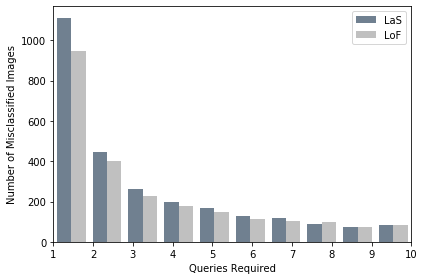

In [29]:
colors = ['slategrey','silver']

#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([idx_LaS_list,idx_LoF_list],color=colors,label=['LaS','LoF'])
ax1.set_xlim(1,10)
ax1.set_ylabel("Number of Misclassified Images")
ax1.set_xlabel("Queries Required")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



# bins = np.linspace(0, 10, 10)

# plt.hist(idx_LaS_list, bins, label='idx_LaS_list',color = 'g')
# plt.hist(idx_LoF_list, bins, label='idx_LoF_list',color = 'b')
# plt.legend(loc='upper right')



# plt.show()

In [30]:
np.save('LaS_k8_10000_mse_001_DenseNet121.npy',idx_LaS_list)
np.save('LoF_k8_10000_mse_001_DenseNet121.npy',idx_LoF_list)





2036
1538


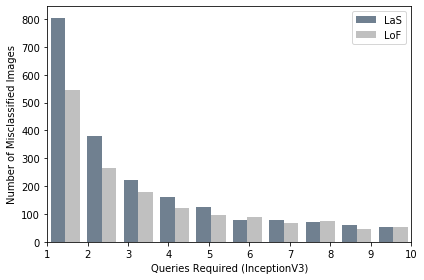

In [3]:
idx_LaS_list = np.load('./result/LaS_k8_10000_mse_001_InceptionV3.npy')
idx_LoF_list = np.load('./result/LoF_k8_10000_mse_001_InceptionV3.npy')

print(len(idx_LaS_list))
print(len(idx_LoF_list))

colors = ['slategrey','silver']

#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([idx_LaS_list,idx_LoF_list],color=colors,label=['LaS','LoF'])
ax1.set_xlim(1,10)
ax1.set_ylabel("Number of Misclassified Images")
ax1.set_xlabel("Queries Required (InceptionV3)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


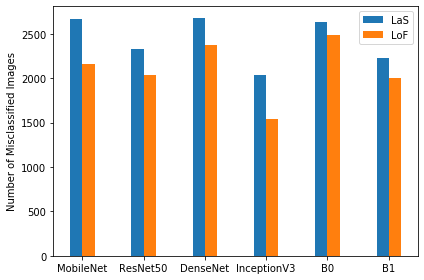

In [55]:
models_name = ['MobileNet', 'ResNet50','DenseNet', 'InceptionV3', 'B0', 'B1' ];
# models_name = ['M1', 'M2','M3', 'M4', 'M5', 'M6' ];


LaS_values = [2667, 2329, 2676, 2036, 2633, 2232]
LoF_values = [2163, 2039, 2371, 1538, 2487, 2006]

colors = ['slategrey','silver']

x = np.arange(len(models_name))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, LaS_values, width, label='LaS')
rects2 = ax.bar(x + width/2, LoF_values, width, label='LoF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of Misclassified Images")
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(models_name)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()